# Day 2 - Embeddings and similarity scores

text-embedding-004(genai)で作成したembeddingsの類似度(内積により算出)を計算し、可視化(sns.heatmap)できるようになる

# Set up the SDK

In [1]:
!pip install -qU google-genai

from google import genai
from google.genai import types

genai.__version__

'1.15.0'

# Creating Client and Exploring models

このガイドでは、embedContent APIメソッドを使用してバッチ埋め込みを計算します。Models.listエンドポイントを介してそれをサポートするモデルを見つけます。埋め込みモデルの詳細については、[モデルページ](https://ai.google.dev/gemini-api/docs/models/gemini#text-embedding)でも確認できます。

In [2]:
GOOGLE_GENAI_USE_VERTEXAI=True
GOOGLE_CLOUD_PROJECT='your-project-id' # #insert your-project-id in VERTEXAI
GOOGLE_CLOUD_LOCATION='us-central1'

In [3]:
client = genai.Client(vertexai = GOOGLE_GENAI_USE_VERTEXAI, project = GOOGLE_CLOUD_PROJECT, location = GOOGLE_CLOUD_LOCATION)

In [4]:
for i in client.models.list():
    print(i.name)

publishers/google/models/chat-bison
publishers/google/models/text-bison
publishers/google/models/imageclassification-efficientnet
publishers/google/models/occupancy-analytics
publishers/google/models/multimodalembedding
publishers/google/models/pt-test
publishers/google/models/imageclassification-vit
publishers/google/models/bert-base
publishers/google/models/vehicle-detector
publishers/google/models/language-v1-classify-text-v1
publishers/google/models/language-v1-analyze-sentiment
publishers/google/models/language-v1-analyze-entity-sentiment
publishers/google/models/language-v1-analyze-syntax
publishers/google/models/resnet50
publishers/google/models/resnet-rs-50
publishers/google/models/imagesegmentation-deeplabv3
publishers/google/models/imageobjectdetection-yolo
publishers/google/models/imageobjectdetection-spinenet
publishers/google/models/owlvit-base-patch32
publishers/google/models/object-detector
publishers/google/models/ppe-detector
publishers/google/models/people-blur
publis

# 類似度（similarility scores）を計算する

この例では、パングラム(The quick brown fox jumps over over the lazy dog)にいくつかのバリエーションを埋め込んでいます。スペルミスやフレーズの短縮などです。比較のために、別のパングラムとやや無関係なフレーズが含まれています。

このタスクでは、埋め込み(embeddings)を使用して類似性スコア(similarility scores)を計算するため、これらの埋め込みの **task_type** は **SEMANTIC_SIMILARITY** です。タスクの完全なリストについては、[APIリファレンス](https://ai.google.dev/api/embeddings#v1beta.TaskType)を確認してください。

In [5]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]

response = client.models.embed_content(
    model = "text-embedding-004",
    contents = texts,
    config = types.EmbedContentConfig(task_type = "SEMANTIC_SIMILARITY")
)

---
視覚化のためのヘルパー関数を定義します（埋め込みの次元サイズが768であるため）
aaaaaa


In [6]:
def truncate(t : str, limit : int = 50) -> str:
    """Truncate labels to fit on the chart."""
    if len(t) > limit:
        return t[:limit - 3] + '...'
    else:
        return t
    
truncated_texts = [truncate(t) for t in texts]

2つの埋め込みベクトルの類似性スコアは、それらの**内積**を計算することによって得ることができます。
uが最初の埋め込みベクトルであり、vが2番目なら、uTvのこと。

APIからは単位長に正規化された埋め込みベクトルを提供するため、これはコサインの類似性でもあります。

このスコアは、行列の自己乗算を通じてすべての埋め込みで計算できます: df @ df.T。

0.0（全く異なる）から1.0（全く似ている）までの範囲は、明るい（0.0）から暗い（1.0）までのヒートマップに描かれていることに注意してください。

In [27]:
#8つのテキストの例があることわかる。
len(response.embeddings)

8

In [31]:
#それぞれの8つのテキストに対して、768次元の数値で表現されていることがわかる。
len(response.embeddings[0].values)

768

<Axes: >

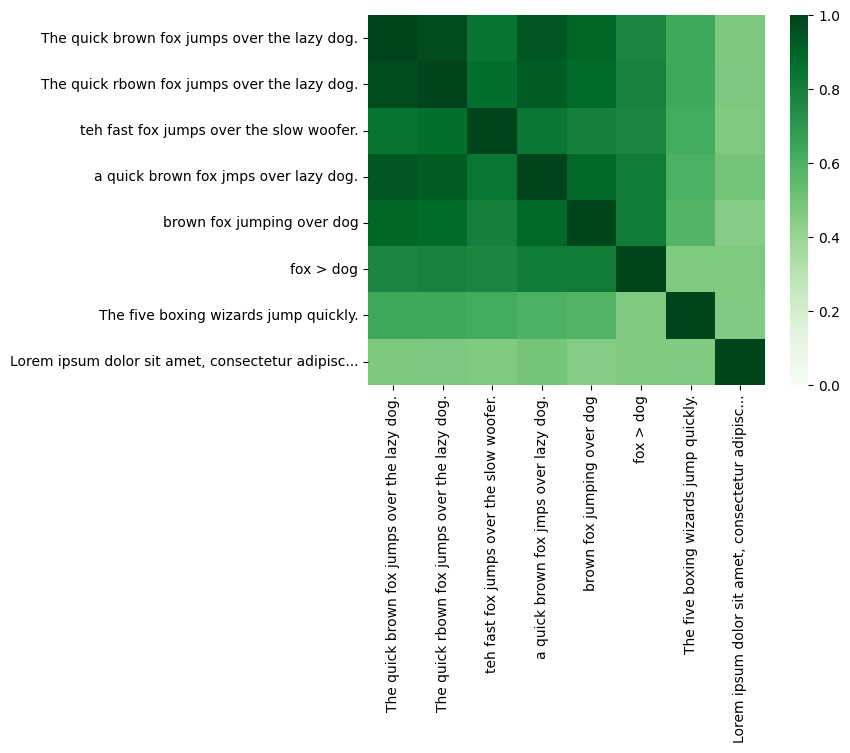

In [24]:
import pandas as pd
import seaborn as sns

# set up the embeddings in a dataframe.
df = pd.DataFrame([e.values for e in response.embeddings], index = truncated_texts)
# Perform the similarity calculation
sim = df @ df.T
# drawing
sns.heatmap(sim, vmin = 0, vmax = 1, cmap = "Greens")

## 発展

* Try exploring the embeddings of your own datasets, or explore those available in [Kaggle datasets](https://www.kaggle.com/datasets).
* Explore [search re-ranking using embeddings](https://github.com/google-gemini/cookbook/blob/main/examples/Search_reranking_using_embeddings.ipynb) with the Wikipedia API
* Perform [anomaly detection using embeddings](https://github.com/google-gemini/cookbook/blob/main/examples/Anomaly_detection_with_embeddings.ipynb)